# Pós Tech Fiap - Tech Challenge Fase 1
**Aplicando Modelo de regressão linear para Previsão de Custos Médicos**
**Grupo 56**
* Araguacy Bezerra Pereira    RM362367
* Emerson Vitorio de Oliveira RM362731
* Robson Carvalho Calixto     RM362870
* Vinicius Fernando M. Costa  RM363007

## Sumário
1. [Configuraçãodo Projeto](#1---configuração-do-projeto)
2. [Definição do Problema](#2---definição-do-problema-de-negócio)
3. [Carregamento e Análise Descritiva dos Dados](#2---carregamento-e-análise-descritiva-dos-dados)
4. [Análise Exploratória](#3---análise-exploratória)
5. [Modelagem](#4---modelagem)
6. [Deploy do Modelo](#5---deploy-do-modelo)

# 1 - Configuração do Projeto

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, kruskal, f_oneway, norm, pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

Informações do ambiente de execução

In [36]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print('')

%reload_ext watermark
%watermark -a "Bibliotecas Utilizadas" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.2

Author: Bibliotecas Utilizadas

pandas    : 2.2.3
seaborn   : 0.13.2
matplotlib: 3.9.2
scipy     : 1.13.1
numpy     : 1.26.4
platform  : 1.0.8



Configuração dos gráficos para visualizar no notebook e ignorar avisos

In [37]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style = "whitegrid")
%matplotlib inline

# 2-Definição do Problema de negócio

O objetivo do projeto é prever o custo médico de um cliente baseado em dados de saúde, para isso utilizamos o dataset disponível no 
[Kaggle](https://www.kaggle.com/code/keremkarayaz/medical-insurance-prediction-94/input). Separamos a exploração do dataset em duas etapas: a primeira etapa é a análise descritiva e a segunda etapa é a análise exploratória. Usamos perguntas para guia as análises, afim de entender melhor o problema e as relações entre as variáveis e o preço do plano de saúde.

### Dicionário de dados

- Age - Idade do cliente
- Diabetes - Se a pessoa tem níveis anormais de açúcar no sangue
- BloodPressureProblems - Se a pessoa tem níveis anormais de pressão arterial
- AnyTransplants - Qualquer transplante de órgão importante
- AnyChronicDiseases - Se o cliente sofre de doenças crônicas
- Height - Altura do cliente
- Weight - Peso do Cliente
- KnownAllergies - Se o cliente tem alguma alergia conhecida
- HistoryOfCancerInFamily - Se algum parente consanguíneo do cliente teve algum tipo de câncer
- NumberOfMajorSurgeries - O número de cirurgias importantes que a pessoa passou
- PremiumPrice - Preço Premium Anual

### Análise dos dados
Durante a análise exploratória, procuramos responder algumas perguntas sobre a população em geral. Procurando entender as principais características da população e as relações entre as variáveis e o preço do plano de saúde.

- Qual é a distribuição etária dos indivíduos?
- Qual é a média, mediana e desvio padrão do preço do plano de saúde?
- Qual é o percentual de pessoas com:
    - Diabetes (Diabetes)
    - Problemas de pressão (BloodPressureProblems)
    - Doenças crônicas (AnyChronicDiseases)
    - Histórico de câncer na família (HistoryOfCancerInFamily)
    - Transplantes (AnyTransplants)
- Qual é o IMC médio da população (IMC = peso / altura²)?
- Qual o percentual de pacientes com sobrepeso ou obesidade (com base no IMC)?
- Qual é a média de PremiumPrice por faixa etária (ex: 18–25, 26–35, etc)?
- Como PremiumPrice varia entre quem tem e não tem condições clínicas específicas?
- Há valores nulos ou inconsistentes em variáveis críticas?
- Existem outliers extremos no PremiumPrice ou nos dados antropométricos?
- PremiumPrice varia significativamente com a idade?
- Pacientes com múltiplas comorbidades têm prêmios mais altos?
- Há diferença o preço do plano de saúde entre pessoas com e sem histórico familiar de câncer?
- Quais faixas etárias concentram os maiores valores de prêmio?
- Quais combinações de condições (ex: diabetes + hipertensão) ocorrem com mais frequência?
- O valor do prêmio parece seguir uma tendência linear ou não-linear com idade/IMC?
- Há limitações no dataset, e quais são?

# 2 - Carregamento e Análise Descritiva dos Dados

In [38]:
df_original = pd.read_csv("data/Medicalpremium.csv")
df_original.shape

(986, 11)

In [39]:
df_original.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


> Avaliando se existem valores ausentes no dataset

In [40]:
df_original.isnull().sum().sort_values(ascending = False)

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

> Avaliando a existência de duplicados.

In [41]:
df_original.duplicated().sum()

0

In [42]:
df_original[['Age', 'Height','Weight','NumberOfMajorSurgeries','PremiumPrice']].describe()

,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,0.667343,24336.713996
std,13.963371,10.098155,14.265096,0.749205,6248.184382
min,18.000000,145.000000,51.000000,0.000000,15000.000000
25%,30.000000,161.000000,67.000000,0.000000,21000.000000
50%,42.000000,168.000000,75.000000,1.000000,23000.000000
75%,53.000000,176.000000,87.000000,1.000000,28000.000000
max,66.000000,188.000000,132.000000,3.000000,40000.000000


Observando os dados estatísticos, podemos concluir que há uma variação considerável entre os valores do plano de saúde, com um desvio padrão de R$ 6.248,18 que representa mais de 25% da média, indicando variação significativa. Também observamos que a média de idade dos indivíduos é de 41,75 anos, com uma idade mínima de 18 anos e máxima de 66 anos, nos indicando que o dataset possui baixa representatividade para menores de idade e idosos acima de 66 anos.

**Qual é a distribuição etária dos indivíduos?**

Análise da distribuição etária dos indivíduos nos permite entender a composição da população em relação à idade. Como o valor do plano tende a ser influenciado pela idade, queremos garantir que não exista uma concentração de grupos etários, caso haja as análises podem ser enviesadas. 

O gráfico mostra que o dataset é formado majoritariamente por adultos de meia-idade, com boa cobertura entre 30 e 60 anos.

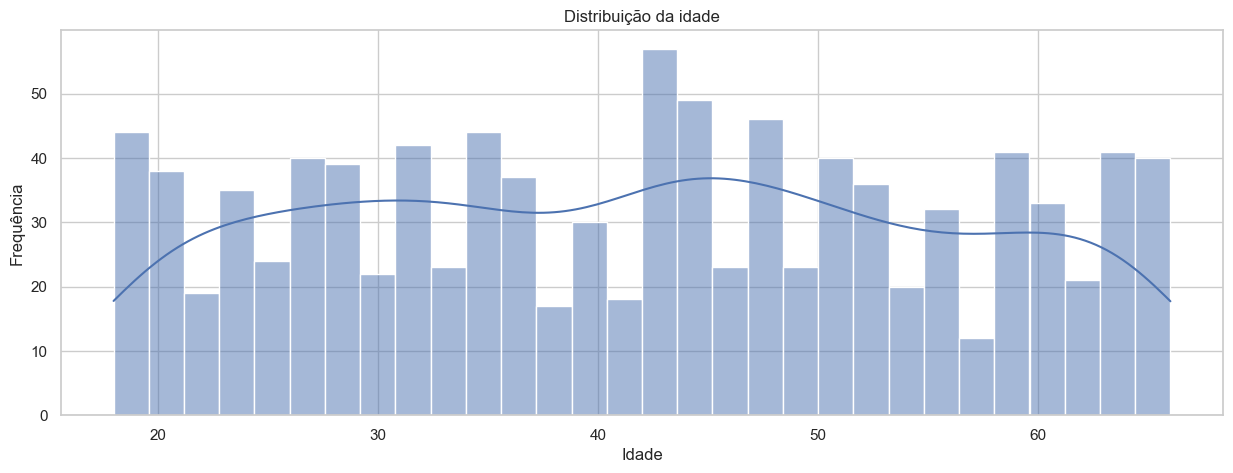

In [70]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df_original['Age'], bins=30, kde=True)
plt.title('Distribuição da idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

**Qual é a média, mediana e desvio padrão do preço do plano de saúde?**

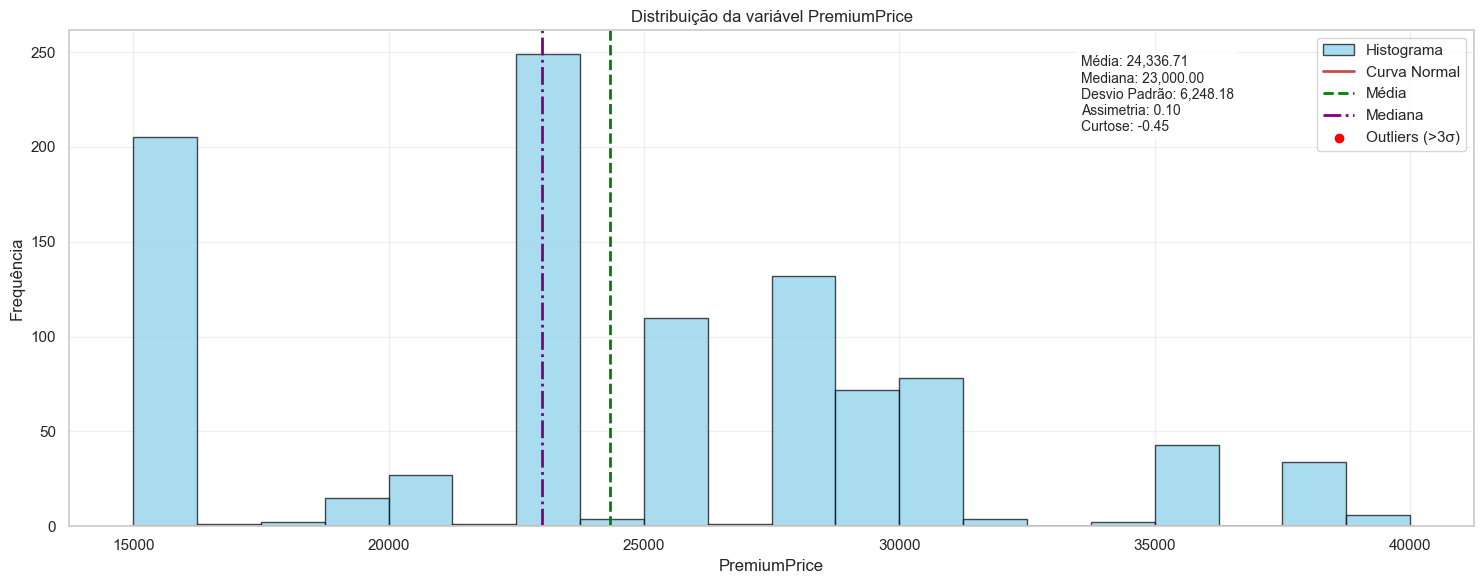

In [74]:
data = df_original['PremiumPrice'].dropna()
mu = data.mean()
std = data.std()
med = data.median()
skewness = data.skew()
kurt = data.kurtosis()

plt.figure(figsize=(15, 6))
count, bins, ignored = plt.hist(data, bins=20, density=False, color='skyblue',
                                 edgecolor='black', alpha=0.7, label='Histograma')

# Curva normal teórica
x = np.linspace(min(bins), max(bins), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r-', linewidth=2, label='Curva Normal')

# Linhas da média e mediana
plt.axvline(mu, color='green', linestyle='--', linewidth=2, label='Média')
plt.axvline(med, color='purple', linestyle='-.', linewidth=2, label='Mediana')

# Outliers visuais (> 3 desvios)
outliers = data[(data < mu - 3*std) | (data > mu + 3*std)]
plt.scatter(outliers, [0]*len(outliers), color='red', zorder=5, label='Outliers (>3σ)')


stats_text = '\n'.join((
    f'Média: {mu:,.2f}',
    f'Mediana: {med:,.2f}',
    f'Desvio Padrão: {std:,.2f}',
    f'Assimetria: {skewness:.2f}',
    f'Curtose: {kurt:.2f}'
))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.72, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.title('Distribuição da variável PremiumPrice') 
plt.xlabel('PremiumPrice')
plt.ylabel('Frequência')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

A variável PremiumPrice apresenta uma média de aproximadamente 24.336,71, enquanto a mediana é 23.000,00, indicando uma distribuição levemente assimétrica à direita (positiva), com presença de alguns valores mais altos que puxam a média para cima.

O desvio padrão é de aproximadamente 6.248,18, o que revela uma dispersão moderada em torno da média, ou seja, os preços variam de forma relativamente ampla dentro do conjunto.

Em resumo, a distribuição de PremiumPrice é quase simétrica, com leve influência de valores mais altos, e mostra uma variabilidade moderada, sem concentração excessiva no centro ou nas extremidades.

O gráfico indica possíveis outliers, esses valores devem ser analisados com cuidado pois pode influenciar negativamente modelos preditivos sensíveis a valores extremos.
